In [1]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## Excercise 1 -  Generated Quantities Block

In [2]:
gen_quant = CmdStanModel(stan_file='code_1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [3]:
samples_1 = gen_quant.sample(data={'M':4}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)
                            
print(samples_1)
samples_1.summary()

INFO:cmdstanpy:CmdStan start procesing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.



CmdStanMCMC: model=code_1 chains=1['method=sample', 'num_samples=1000', 'num_warmup=0', 'algorithm=fixed_param']
 csv_files:
	C:\Users\jvlsq\AppData\Local\Temp\tmpojzhu_gr\code_1-20220417202850.csv
 output_files:
	C:\Users\jvlsq\AppData\Local\Temp\tmpojzhu_gr\code_1-20220417202850_0-stdout.txt


,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,0.0,NaN,0,0.0,0,0.0,NaN,NaN,NaN
lambda,100.0,2.6,76,7.4,87,250.0,870.0,72000.0,1.0
y_sim[1],102.0,2.6,77,7.0,87,254.0,852.0,70995.0,1.0
y_sim[2],102.0,2.5,76,7.0,88,253.0,885.0,73754.0,1.0
y_sim[3],102.0,2.6,78,8.0,85,249.0,874.0,72819.0,1.0
y_sim[4],102.0,2.6,77,6.0,86,248.0,882.0,73519.0,1.0


In [4]:
draws_pd_stan_1 = samples_1.draws_pd()
print(draws_pd_stan_1)

     lp__  accept_stat__    lambda  y_sim[1]  y_sim[2]  y_sim[3]  y_sim[4]
0     0.0            0.0    8.5502       3.0       8.0      12.0       9.0
1     0.0            0.0  115.2370     105.0     125.0     112.0     108.0
2     0.0            0.0   71.7686      75.0      79.0      57.0      67.0
3     0.0            0.0   69.6265      74.0      81.0      75.0      78.0
4     0.0            0.0  110.0770      95.0     108.0      99.0     111.0
..    ...            ...       ...       ...       ...       ...       ...
995   0.0            0.0   24.6579      25.0      27.0      26.0      20.0
996   0.0            0.0   55.5689      47.0      49.0      52.0      53.0
997   0.0            0.0  209.9880     215.0     193.0     216.0     190.0
998   0.0            0.0   61.7996      67.0      57.0      47.0      65.0
999   0.0            0.0  134.9790     131.0     148.0     131.0     138.0

[1000 rows x 7 columns]


array([[<AxesSubplot:title={'center':'y_sim[1]'}>,
        <AxesSubplot:title={'center':'y_sim[2]'}>],
       [<AxesSubplot:title={'center':'y_sim[3]'}>,
        <AxesSubplot:title={'center':'y_sim[4]'}>]], dtype=object)

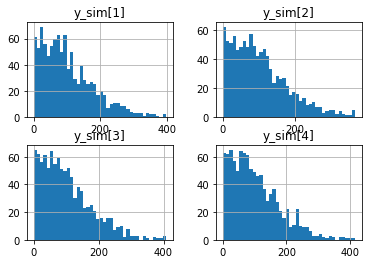

In [5]:
del draws_pd_stan_1['lp__']
del draws_pd_stan_1['accept_stat__']
del draws_pd_stan_1['lambda']
draws_pd_stan_1.hist(bins=40)

## Excercise 2 - Constraints on the data 

In [6]:
bern1 = CmdStanModel(stan_file='code_2.stan')
samp_bern1 = bern1.sample(data={'N':2, 'y':[0,1]})

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [7]:
bern2 = CmdStanModel(stan_file='code_3.stan')
samp_bern2 = bern2.sample(data={'N':2, 'y':[0,1]})

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


array([[<AxesSubplot:title={'center':'theta'}>]], dtype=object)

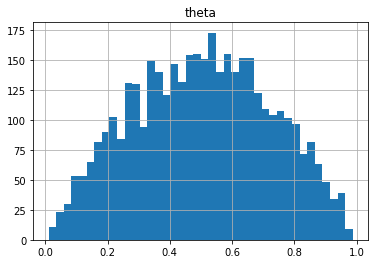

In [8]:
draws_theta_a = samp_bern1.draws_pd('theta')
draws_theta_a.hist(bins=40)

array([[<AxesSubplot:title={'center':'theta'}>]], dtype=object)

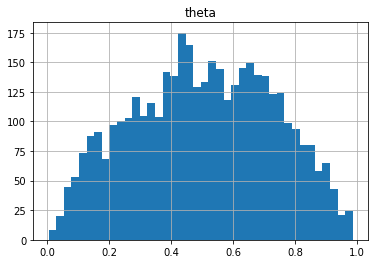

In [9]:

draws_theta_b = samp_bern2.draws_pd('theta')
draws_theta_b.hist(bins=40)

## Excercise 3 - Constraints on parameters

### Unconstrained parameters

In [10]:
model_gm1 = CmdStanModel(stan_file='code_4.stan')
out_gamma1 = model_gm1.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma1.diagnose()


INFO:cmdstanpy:compiling stan file E:\AGH\2022-1\2_Data_Analytics\lab2\code_4.stan to exe file E:\AGH\2022-1\2_Data_Analytics\lab2\code_4.exe
INFO:cmdstanpy:compiled model executable: E:\AGH\2022-1\2_Data_Analytics\lab2\code_4.exe
INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status





chain 1 |██▋       | 00:00 Iteration: 1600 / 7000 [ 22%]  (Sampling)


chain 1 |██████▋   | 00:00 Iteration: 4500 / 7000 [ 64%]  (Sampling)
chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: E:\\AGH\\2022-1\\2_Data_Analytics\\lab2\\samples\\code_4-20220417202912_1.csv, E:\\AGH\\2022-1\\2_Data_Analytics\\lab2\\samples\\code_4-20220417202912_2.csv, E:\\AGH\\2022-1\\2_Data_Analytics\\lab2\\samples\\code_4-20220417202912_3.csv, E:\\AGH\\2022-1\\2_Data_Analytics\\lab2\\samples\\code_4-20220417202912_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n8638 of 24000 (35.99%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

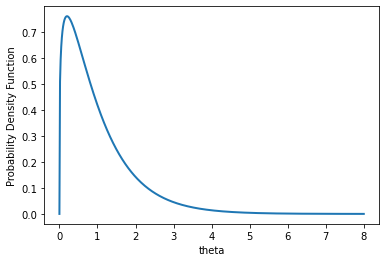

In [11]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples with 160 bins

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()


array([[<AxesSubplot:title={'center':'theta'}>]], dtype=object)

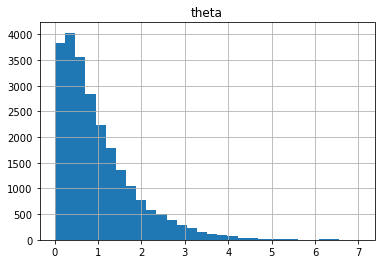

In [12]:
draws_theta_3a = out_gamma1.draws_pd('theta')
draws_theta_3a.hist(bins=30)

### Constrained parameter

In [13]:
model_gm2 = CmdStanModel(stan_file='code_5.stan')
out_gamma2 = model_gm2.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma2.diagnose()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status


chain 1 |████      | 00:00 Iteration: 2600 / 7000 [ 37%]  (Sampling)


chain 1 |████████▎ | 00:00 Iteration: 5700 / 7000 [ 81%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


'Processing csv files: E:\\AGH\\2022-1\\2_Data_Analytics\\lab2\\samples\\code_5-20220417202914_1.csv, E:\\AGH\\2022-1\\2_Data_Analytics\\lab2\\samples\\code_5-20220417202914_2.csv, E:\\AGH\\2022-1\\2_Data_Analytics\\lab2\\samples\\code_5-20220417202914_3.csv, E:\\AGH\\2022-1\\2_Data_Analytics\\lab2\\samples\\code_5-20220417202914_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\nNo divergent transitions found.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete, no problems detected.\n'

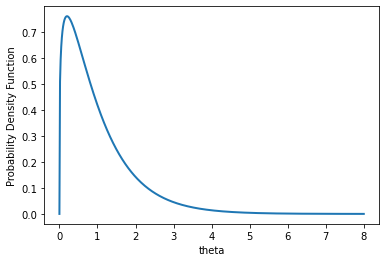

In [14]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples from the second model with 160 bins

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

array([[<AxesSubplot:title={'center':'theta'}>]], dtype=object)

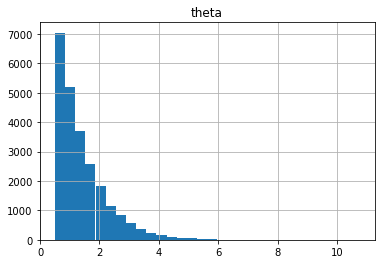

In [15]:
draws_theta_3b = out_gamma2.draws_pd('theta')
draws_theta_3b.hist(bins=30)
#Constarin changed to 0.5 and the graph pints that there were found 7000 sampleswith that value aproximadetly, over the others

## Excercise 4 -  Selection of parameters using equation solving



In [16]:
model_tune = CmdStanModel(stan_file='code_6.stan')
F = len("Jhon")
L = len("Velasquez")
y0 = 2

data={'y_guess':[y0],
        'theta':[(F+L)/2]}
tunes = model_tune.sample(data=data, fixed_param=True, iter_sampling=100, iter_warmup=0, chains = 1)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start procesing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [17]:
print(tunes)
tunes.summary()

CmdStanMCMC: model=code_6 chains=1['method=sample', 'num_samples=100', 'num_warmup=0', 'algorithm=fixed_param']
 csv_files:
	C:\Users\jvlsq\AppData\Local\Temp\tmpojzhu_gr\code_6-20220417202916.csv
 output_files:
	C:\Users\jvlsq\AppData\Local\Temp\tmpojzhu_gr\code_6-20220417202916_0-stdout.txt


,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,0.0,NaN,0,0.0,0.0,0.0,NaN,NaN,NaN
sigma,2.5,NaN,0,2.5,2.5,2.5,NaN,NaN,NaN


## Excercise 5 - different methods of defining models


In [18]:
model_samp_st = CmdStanModel(stan_file='code_7.stan')
model_log_target = CmdStanModel(stan_file='code_8.stan')
model_log_target_ind = CmdStanModel(stan_file='code_9.stan')

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling


In [19]:
data = {'N': F}
seed = 19071998#integer, your date of birth in the DDMMYYYY format without leading zero (or if you are GPRD weary, use any other date you wish)
result_1 = model_samp_st.sample(data=data)

INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status




chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed                       

chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [20]:

result_2 = model_log_target.sample(data=data,seed=seed)

INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status





chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [21]:
result_3 = model_log_target_ind.sample(data)

INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status


chain 1 |█████████ | 00:00 Iteration: 1700 / 2000 [ 85%]  (Sampling)
chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed                       


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


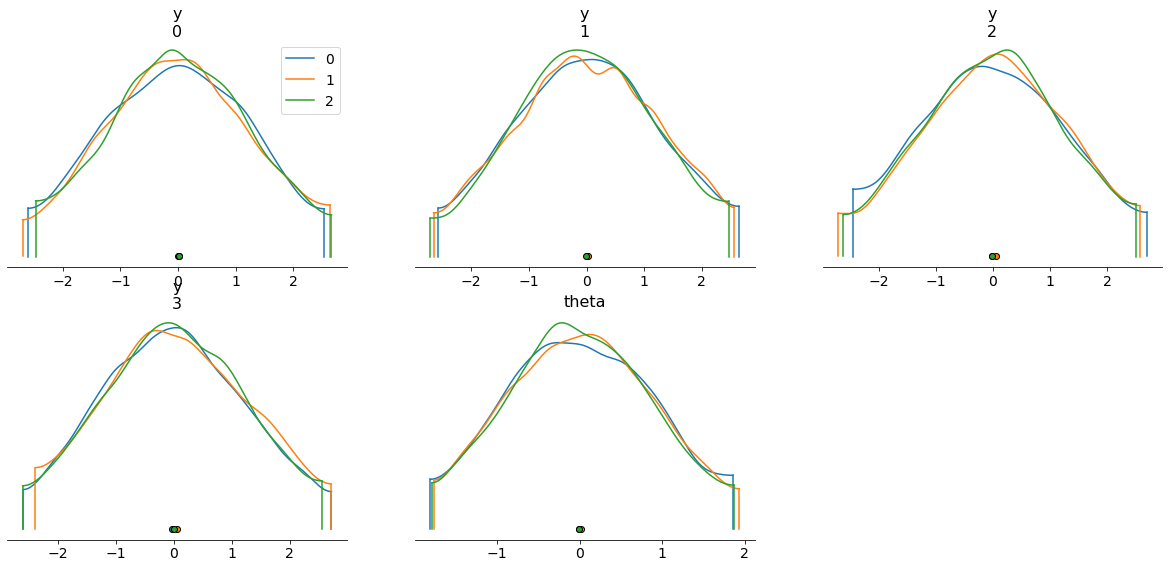

In [22]:
az.plot_density([result_1,result_2,result_3])
plt.show()

## Excercise 6 - generated quantities post sampling

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [4] done processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [1] done processing


[-0.393176 -1.09419  -1.04064  ...  0.9442    1.12742   1.78406 ]


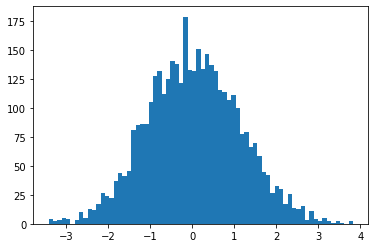

In [23]:
model_gq = CmdStanModel(stan_file='code_10.stan')
# fill in with chosen result from previous excercise
mean_of_y = model_gq.generate_quantities(data=data,
                                        mcmc_sample = result_2)
# investigate the output and plot histogram of mean_y variableŌ
df = mean_of_y.stan_variable('mean_y')
print(df)
plt.hist(df, bins=70)
plt.show()